# Redução de dimensioalidade e seleção de features

Existe uma diferença entre seleção de features e redução de dimensionalidade. A seleção de features se trata da aplicação de filtros nos dados originais para selecionar os melhores atributos de acordo com um critério de desempenho. A redução de dimensionalidade, por sua vez, trata-se da aplicação de transformações matemáticas nos dados para, a partir disso, selecionar os atributos que devem ser mantidos e os que devem ser descartados.

Objetivo: aprender os conceitos de redução de dimensionalidade, utilizando uma base de dados com muitos atributos previsores.

Primeiramente vamos fazer o pré-processamento dos dados, verificando se há ou não a presença de valores faltantes na base de dados. Em seguida, utilizamos um classificador random forest para obter uma baseline de referência para o processo de redução da dimensionalidade dos dados, para verificar o ganho de acurácia do modelo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random

In [ ]:
base_dados = pd.read_csv('exames.csv')

In [ ]:
#Tamanho da base de dados
base_dados.shape

(569, 35)

In [ ]:
#Visualizando o conteúdo da base de dados.
base_dados.head(10)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
5,843786,M,12.45,15.70,82.57,103.78,477.1,0.12780,0.17000,0.15780,...,103.40,741.6,0.1791,0.5249,0.5355,0.786,0.1741,0.3985,0.12440,0.804347
6,844359,M,18.25,19.98,119.60,103.78,1040.0,0.09463,0.10900,0.11270,...,153.20,1606.0,0.1442,0.2576,0.3784,0.786,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,103.78,577.9,0.11890,0.16450,0.09366,...,110.60,897.0,0.1654,0.3682,0.2678,0.786,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,103.78,519.8,0.12730,0.19320,0.18590,...,106.20,739.3,0.1703,0.5401,0.5390,0.786,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,103.78,475.9,0.11860,0.23960,0.22730,...,97.65,711.4,0.1853,1.0580,1.1050,0.786,0.2210,0.4366,0.20750,NaN


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [ ]:
base_dados.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,150.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,...,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946,0.490452
std,1.250206e+08,3.524049,4.301036,24.298981,1.422336e-14,351.914129,0.014064,0.052813,0.079720,0.038803,...,33.602542,569.356993,0.022832,0.157336,0.208624,1.111200e-16,0.065732,0.061867,0.018061,0.295748
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,...,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,...,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460,0.209129
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,...,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040,0.472064
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,...,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080,0.780266
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,...,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


In [ ]:
base_dados['diagnostico'].value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

In [ ]:
#Verificando a presença de valores faltantes na base de dados, valores NaN.

#O seguinte comando indica a quantidade de valores faltantes em cada coluna da base de dados.
base_dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Como a coluna 'exame_33' tem 419 valores faltantes, o que corresponde a cerca de 74% dos dados. A melhor alternativa, nesse caso, é remover a coluna da base de dados.

In [ ]:
base_dados.drop(columns = ['exame_33'], inplace = True)
base_dados.isnull().sum()

id             0
diagnostico    0
exame_1        0
exame_2        0
exame_3        0
exame_4        0
exame_5        0
exame_6        0
exame_7        0
exame_8        0
exame_9        0
exame_10       0
exame_11       0
exame_12       0
exame_13       0
exame_14       0
exame_15       0
exame_16       0
exame_17       0
exame_18       0
exame_19       0
exame_20       0
exame_21       0
exame_22       0
exame_23       0
exame_24       0
exame_25       0
exame_26       0
exame_27       0
exame_28       0
exame_29       0
exame_30       0
exame_31       0
exame_32       0
dtype: int64

In [ ]:
valores_exames = base_dados.drop(columns = ['id','diagnostico'])
diagnostico = base_dados['diagnostico']

In [ ]:
SEED = 123143
random.seed(SEED)
treino_X, teste_X, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size = 0.3)

In [ ]:
treino_X.shape

(398, 32)

In [ ]:
treino_X

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
268,12.87,16.21,82.38,103.78,512.2,0.09425,0.06219,0.03900,0.016150,0.2010,...,23.64,89.27,597.5,0.12560,0.1808,0.19920,0.786,0.05780,0.3604,0.07062
422,11.61,16.02,75.46,103.78,408.2,0.10880,0.11680,0.07097,0.044970,0.1886,...,19.67,81.93,475.7,0.14150,0.2170,0.23020,0.786,0.11050,0.2787,0.07427
168,17.47,24.68,116.10,103.78,984.6,0.10490,0.16030,0.21590,0.104300,0.1538,...,32.33,155.30,1660.0,0.13760,0.3830,0.48900,0.786,0.17210,0.2160,0.09300
501,13.82,24.49,92.33,103.78,595.9,0.11620,0.16810,0.13570,0.067590,0.2275,...,32.94,106.00,788.0,0.17940,0.3966,0.33810,0.786,0.15210,0.3651,0.11830
563,20.92,25.09,143.00,103.78,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.4186,0.65990,0.786,0.25420,0.2929,0.09873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,14.62,24.02,94.57,103.78,662.7,0.08974,0.08606,0.03102,0.029570,0.1685,...,29.11,102.90,803.7,0.11150,0.1766,0.09189,0.786,0.06946,0.2522,0.07246
144,10.75,14.97,68.26,103.78,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,...,20.72,77.79,441.2,0.10760,0.1223,0.09755,0.786,0.03413,0.2300,0.06769
133,15.71,13.93,102.00,103.78,761.7,0.09462,0.09462,0.07135,0.059330,0.1816,...,19.25,114.30,922.8,0.12230,0.1949,0.17090,0.786,0.13740,0.2723,0.07071
282,19.40,18.18,127.20,103.78,1145.0,0.10370,0.14420,0.16260,0.094640,0.1893,...,28.65,152.40,1628.0,0.15180,0.3749,0.43160,0.786,0.22520,0.3590,0.07787


In [ ]:
treino_y

268    B
422    B
168    M
501    M
563    M
      ..
90     B
144    B
133    B
282    M
157    B
Name: diagnostico, Length: 398, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

SEED = 123143
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_X, treino_y)
print('Resultado da acurácia do modelo com os dados de treinamento: {:.2f}%'.format(classificador.score(teste_X, teste_y)*100))

Resultado da acurácia do modelo com os dados de treinamento: 91.81%


Para avaliar o desempenho do modelo de aprendizado de máquina, precisamos de um valor de referência para comparações, denominadod e baseline. Tal valor pode ser obtido utilizado a função DummyClassifier da biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

O DummyClassifier é um classificador "bobo" que utiliza uma determinada estratégia para classificação. No presente caso, vamos utilizar a estratégia do rótulo que aparece com maior frequência, os demais dados serão classificados recebendo o rótulo de maior frequência.

O valor obtido a partir da classificação com o DummyClassifier é utilizada como valor de referência para valiar o desempenho obtido com outros modelos.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy = 'most_frequent')
classificador_dummy.fit(treino_X, treino_y)
print('Resultado da classificação dummy: {:.2f}%'.format(classificador_dummy.score(teste_X,teste_y)*100))

Resultado da classificação dummy: 66.67%


Portanto, o classificador random forest apresenta um excelente resultado para esse conjunto de dados, uma vez que a acurácia do modelo é significativamente superior ao obtido com o classificador dummy.

Agora, vamos utilizar o parâmetro de desempenho do modelo random forest utilizando todas as features inicialmente disponíveis e vamos selecionar os melhores atributos, de modo a reduzir a dimensionalidade do conjunto de dados. A redução de dimensionalidade deve ocorrer sem perda de desempenho do modelo.

#Estudando o comportamento dos dados

In [ ]:
import seaborn as sns

Para estudar o comportamento das variáveis, vamos dividir condicionalmente os dados a partir da variável "diagnostico" e estudar os padrões de comportamento dos indíviduos que obtiveram diagnóstico maligno (M) e benigno (B). Para isso, utilizamos a visualização de dados 'violinplot' da biblioteca Seaborn.

In [ ]:
base_dados = base_dados.drop(columns = 'id')
base_dados

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


In [ ]:
dados_plot = pd.melt(base_dados, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.99000
1,M,exame_1,20.57000
2,M,exame_1,19.69000
3,M,exame_1,11.42000
4,M,exame_1,20.29000
...,...,...,...
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400


In [ ]:
import matplotlib.pyplot as plt

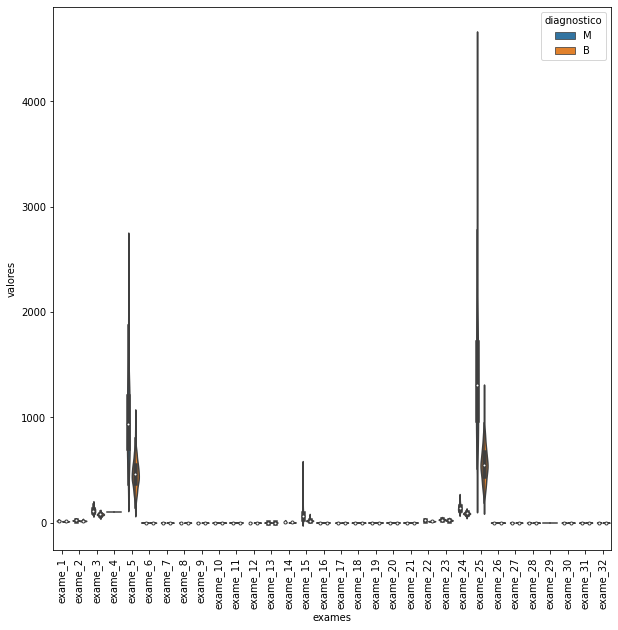

In [ ]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames',y = 'valores', data = dados_plot, hue = 'diagnostico')

Como podemos ver,as features estão em escalas muito diferentes.

# Padronizando o conjunto de features para uma mesma escala usando o StandarScaler

Como podemos visualizar, os dados para cada variável estão em diferentes escalas. Portanto, para trabalharmos com os dados dessa base de dados, devemos padronizá-los para obtenção de dados na mesma escala. Para isso, utilizamos a função StandardScaler da biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

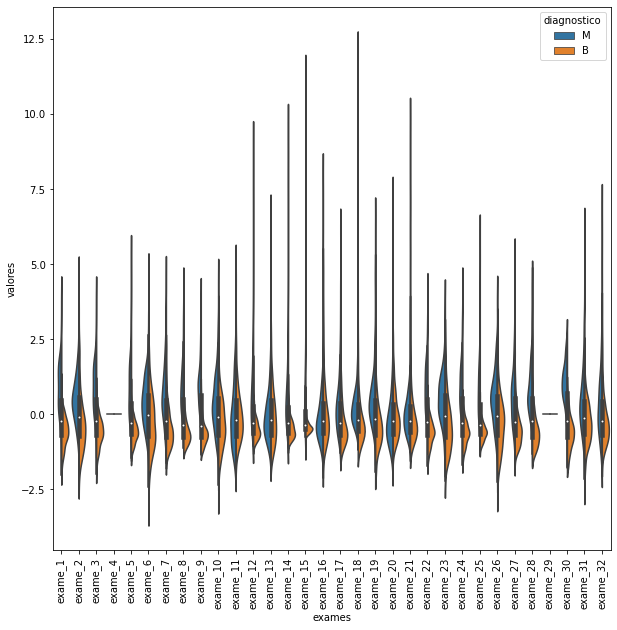

In [ ]:
#criando uma visualização para todas as variáveis, temos:

from sklearn.preprocessing import StandardScaler

base_dados_features = base_dados.drop(columns = 'diagnostico')
base_dados_labels = pd.DataFrame({'diagnostico':base_dados['diagnostico']})

#instanciando um objeto do tipo StandarScaler
padronizador = StandardScaler()
padronizador.fit(base_dados_features)
#criando uma nova variável com os valores padronizados
base_dados_features_1 = padronizador.transform(base_dados_features)

base_dados_features = pd.DataFrame(data = base_dados_features_1, columns = base_dados_features.keys())

base_dados_features_aux = base_dados_features

base_dados_padronizada = pd.concat([base_dados_labels, base_dados_features_aux], axis = 1)

dados_plot = pd.melt(base_dados_padronizada, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames',y = 'valores', data = dados_plot, hue = 'diagnostico', split = True)

Na célula acima, todas as variáveis foram padronizdas para uma mesma escala. Com isso conseguimos visualizar melhor a distribuição das variáveis de acordo com o tipo de rótulo 'maligno' (M) ou 'benigno' (B). No entanto, a visualização é difícil quando utilizamos todos os dados em uma mesma figura. Podemos separar os dados por variável em figuras separadas para obter uma visualização mais agradável.

Podemos criar uma visualização para um subconjunto das variáveis:

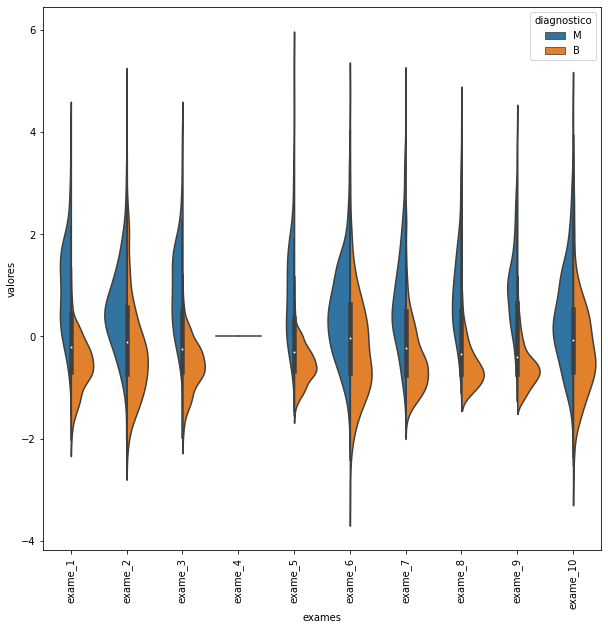

In [ ]:
#Visualizando os exames 11 a 20:

base_dados_features_aux = base_dados_features.iloc[:,0:10]

base_dados_padronizada_aux = pd.concat([base_dados_labels, base_dados_features_aux], axis = 1)

dados_plot = pd.melt(base_dados_padronizada_aux, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames',y = 'valores', data = dados_plot, hue = 'diagnostico', split = True)

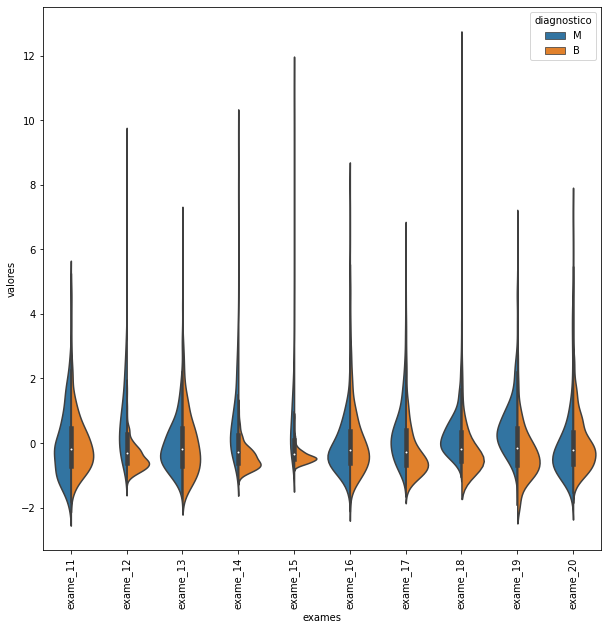

In [ ]:
#Visualizando os exames 11 a 20:

base_dados_features_aux = base_dados_features.iloc[:,10:20]

base_dados_padronizada_aux = pd.concat([base_dados_labels, base_dados_features_aux], axis = 1)

dados_plot = pd.melt(base_dados_padronizada_aux, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames',y = 'valores', data = dados_plot, hue = 'diagnostico', split = True)

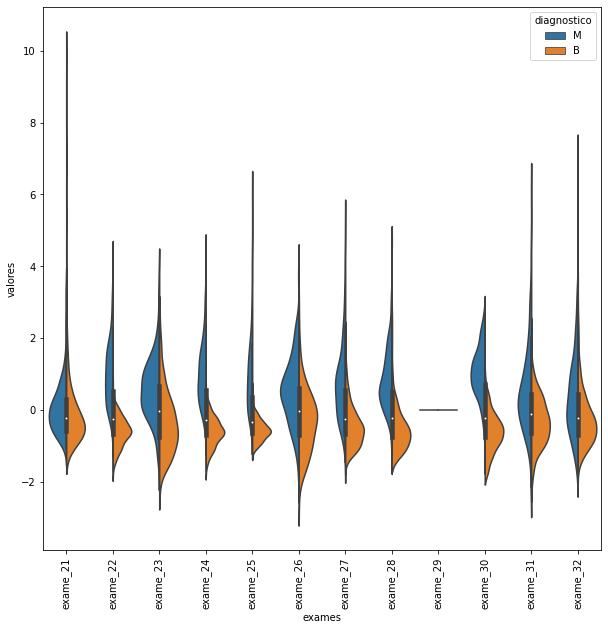

In [ ]:
#Visualizando os exames 21 a 32:

base_dados_features_aux = base_dados_features.iloc[:,20:33]

base_dados_padronizada_aux = pd.concat([base_dados_labels, base_dados_features_aux], axis = 1)

dados_plot = pd.melt(base_dados_padronizada_aux, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exames',y = 'valores', data = dados_plot, hue = 'diagnostico', split = True)

In [ ]:
#base de dados com as variáveis padronizadas resultantes da etapa anterior:

base_dados_padronizada

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


A partir da vissualização so gráficos de violinplot podemos verificar que algumas variáveis são constantes: 'exame_4' e 'exame_29'. Esses atributos devem ser removidos da base de dados, uma vez que, por serem constantes, não contribuem para o desempenho do modelo de ajuste aos dados.

In [ ]:
#verificando se as variáveis 'exame_4' e 'exame_29' são constantes:

base_dados_padronizada['exame_4'].value_counts()

1.421085e-14    569
Name: exame_4, dtype: int64

In [ ]:
base_dados_padronizada['exame_29'].value_counts()

1.110223e-16    569
Name: exame_29, dtype: int64

Portanto, ambos devem ser removidos:

In [ ]:
base_dados_padronizada.drop(columns = ['exame_4','exame_29'], inplace = True)
base_dados_padronizada.columns

Index(['diagnostico', 'exame_1', 'exame_2', 'exame_3', 'exame_5', 'exame_6',
       'exame_7', 'exame_8', 'exame_9', 'exame_10', 'exame_11', 'exame_12',
       'exame_13', 'exame_14', 'exame_15', 'exame_16', 'exame_17', 'exame_18',
       'exame_19', 'exame_20', 'exame_21', 'exame_22', 'exame_23', 'exame_24',
       'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30', 'exame_31',
       'exame_32'],
      dtype='object')

In [ ]:
base_dados_padronizada

,diagnostico,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
#Criando uma função para classificação e comparação dos resultados de desempenho

def classificar(dataframe,test_size,label):

  SEED = 12314
  random.seed(SEED)

  X = dataframe.drop(columns = label)
  y = dataframe[label]
  treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = test_size)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_X, treino_y)
  return(print('Resultado da acurácia do modelo com os dados de treinamento: {:.2f}%'.format(classificador.score(teste_X, teste_y)*100)))

In [ ]:
classificar(base_dados_padronizada, 0.25, 'diagnostico')

Resultado da acurácia do modelo com os dados de treinamento: 96.50%


# Visualização da correlação entre variáveis

Construindo a matriz de correlação para o conjunto de dados padronizado, temos:

In [ ]:
matriz_correlacao = base_dados_padronizada.corr()

Podemos visualizar melhor as correlações através de um mapa de um mapa de calor da função heatmap da biblioteca seaborn: https://seaborn.pydata.org/generated/seaborn.heatmap.html

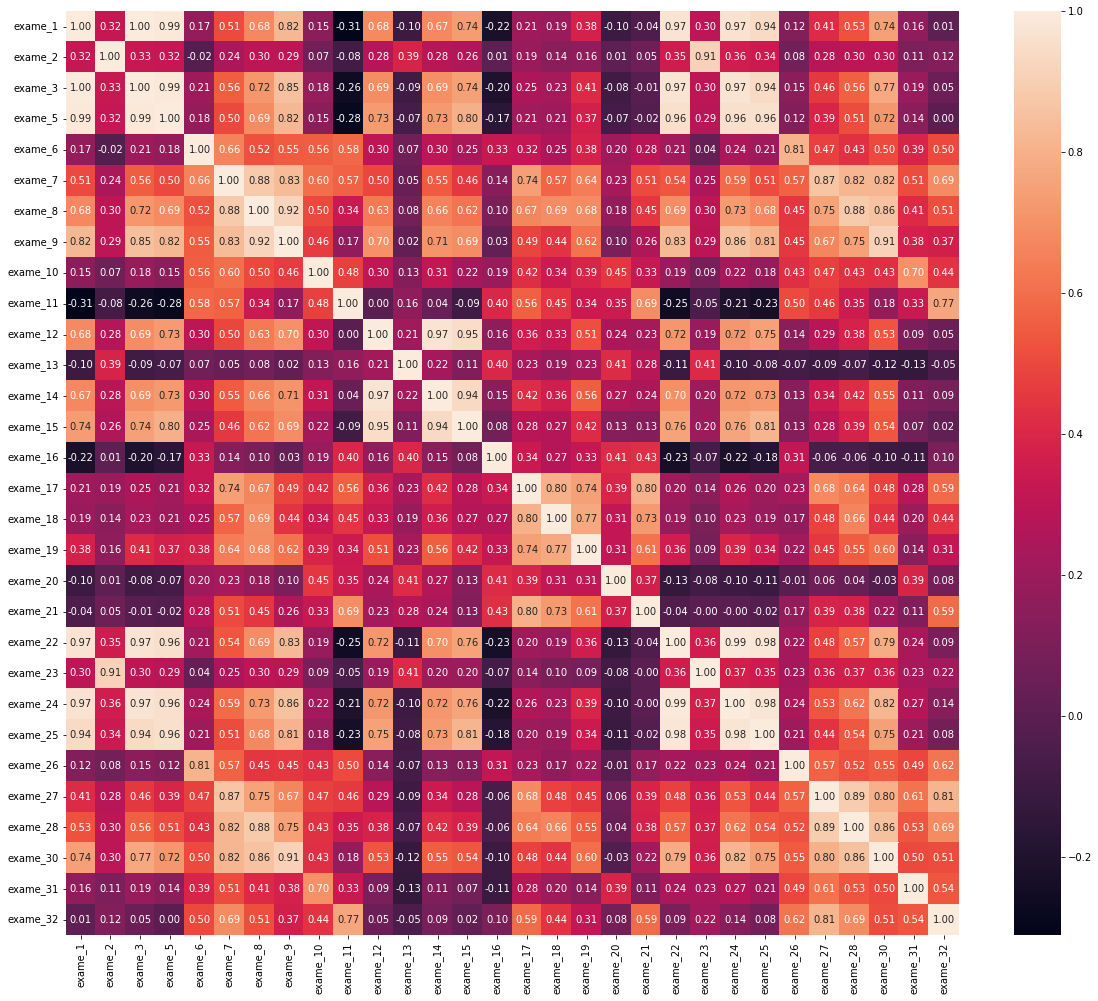

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,17))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.2f')

A partir do mapa de calor, podemos identificar quais variáveis estão altamente correlacionadas entre si e escolher uma das variáveis para ser removida do conjunto de dados. Tal procedimento garante a redução da dimensionalidade e aumenta o desempenho do modelo.

# Seleção de k melhores atributos com o SelectKBest

Analisar cada variável, uma por uma, pode ser um processo complicado e massante. Para fazer a redução da dimensionalidade e selecionar os melhores atributos para o treinamento e teste do modelo, podemos utilizar a função SelectKBest da biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
base_dados = base_dados.drop(columns = ['exame_4','exame_29'])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

#Segmentando os dados em teste e treino
X = base_dados.drop(columns = 'diagnostico')
y = base_dados['diagnostico']

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.3)

#instanciando um objeto do tipo SelectKBest
#O parâmetro k = 5 indica que queremos apenas os 5 melhores atributos do conjunto de dados.
selecionar_kmelhores = SelectKBest(chi2, k = 7)

#ajustando os dados
selecionar_kmelhores.fit(treino_X, treino_y)

#selecionando os melhores atributos e criando o novo conjunto de treino e teste, temos:
treino_X_kbest = selecionar_kmelhores.transform(treino_X)
teste_X_kbest = selecionar_kmelhores.transform(teste_X)

In [ ]:
#visualizando o tamanho dos conjuntos de treino e teste resultantes:

treino_X_kbest.shape

(398, 7)

In [ ]:
teste_X_kbest.shape

(171, 7)

In [ ]:
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_X_kbest, treino_y)

print('Resultado da acurácia do modelo com os dados de teste: {:.2f}%'.format(classificador.score(teste_X_kbest, teste_y)*100))

Resultado da acurácia do modelo com os dados de teste: 91.81%


**Conclusão**

Utilizando os 5 melhores atributos da base de dados, de um total de 32, a acurácia do modelo, de modo geral, apresentou valor de 91,81%. Anteriormente foi obtido um valor de acurácia de 96%. Apesar da grande redução da quantidade de atributos, houve uma ligeira diminuição do desempenho do modelo.

# Matriz de confusão para avaliação do desempenho do modelo

Até aqui, utilizamos a precisão simples do modelo, que é dada pela razão entre a quantidade de acertos e o total de exemplos utilizados para teste. Porém, tal ferramente apresenta grandes problemas na avaliação do desempenho, uma vez que não nos dá informações sobre como o modelo classifica para as diferentes classes. Esse problema é especialmente relevante quando utilizamos um conjunto de dados com classes desequilibradas, que é o caso mais comum encontrado no mundo real. Conjuntos de dados com classes desequilibradas são conjuntos que apresentam variáveis com alta prevalência de ocorrência e classes com ocorrência rara. 

Uma forma de avaliar melhor o desempenho dos modelos de classificação é utilizando matriz de confusão, onde decompomos as classes e analisamos as decisões que foram tomadas pelo algoritmo.

Para construção de uma matriz de confusão, podemos utilizar a função matrix_confusion da biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#utilizando o classificador treinado anteriormente, temos:
y_previsto = classificador.predict(teste_X_kbest)

matriz_confusao = confusion_matrix(teste_y, y_previsto)

matriz_confusao

array([[101,   4],
       [ 10,  56]])

[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Previsto')]

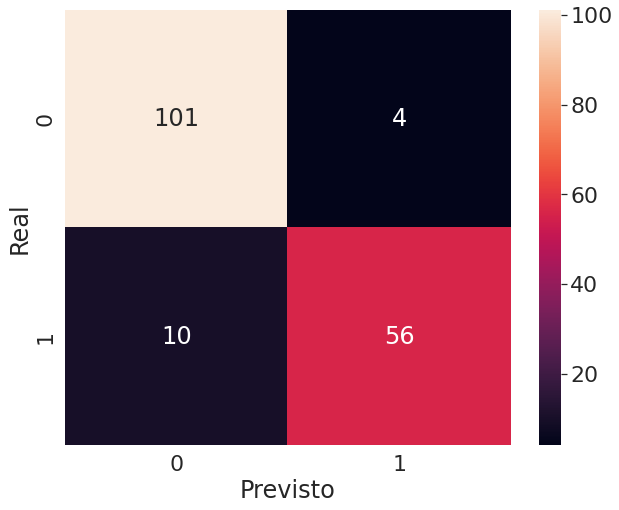

In [ ]:
#criando uma visualização melhor para a matriz de confusão

plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Previsto', ylabel = 'Real')

#Seleção dos melhores atributos utilizando o RFE

Anteriormente, para a seleção dos melhores atributos da base de dados, utilizamos o SelectKBest. No entanto, para a seleção dos melhores atributos, é necessário informar a quantidade de características que devem ser escolhidas a partir de uma função de medição de desempenho especificada, sem ter informações do quão boa são as variáveis selecionadas. Um método alternativo para seleção dos melhores atributos é a técnica RFE.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
#Segmentando os dados em teste e treino
X = base_dados.drop(columns = 'diagnostico')
y = base_dados['diagnostico']

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

#segmentos de teste e treino contendo todas as features
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.3)

#Selecionando as 5 melhores features do conjunto de dados
selecionador_RFE = RFE(estimator = classificador,n_features_to_select =5 , step = 1)
selecionador_RFE.fit(treino_X, treino_y)

#criando um novo conjunto de features para treino e teste a partir da seleção das 5 melhores, obtidas a partir da função RFE
treino_X_rfe = selecionador_RFE.transform(treino_X)
teste_X_rfe = selecionador_RFE.transform(teste_X)

In [ ]:
#Avaliando o desempenho do modelo

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_X_rfe, treino_y)

#acurácia do modelo
print('Resultado da acurácia do modelo com os dados de teste: {:.2f}%'.format(classificador.score(teste_X_rfe, teste_y)*100))

Resultado da acurácia do modelo com os dados de teste: 89.47%


[Text(56.5, 0.5, 'Real'), Text(0.5, 38.5, 'Previsto')]

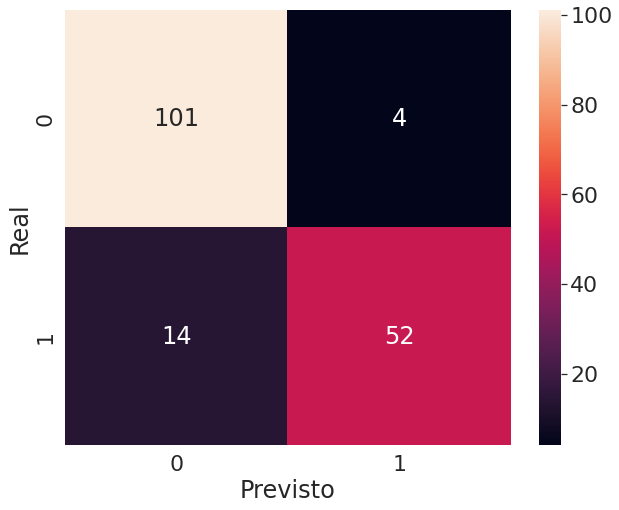

In [ ]:
#matriz de confusão para o modelo

y_previsto = classificador.predict(teste_X_rfe)

matriz_confusao = confusion_matrix(teste_y, y_previsto)

plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Previsto', ylabel = 'Real')

#Seleção de atributos com o RFECV

Anteriormente utilizamos a técnica SelectKBest e RFE para seleção dos k melhores atributos de um conjunto de dados. Neste momento, queremos avaliar qual o melhor conjunto de variáveis da base de dados. Podemos utilizar a técnica RFECV para essa tarefa. O RFECV segmenta a base de dados em vários subconjuntos e para cada segmento seleciona um grupo de atributos e avalia o desmpenho, após isso os modelos são comparados e os melhores atributos são selecionados.

A técnica do RFECV é diferente do SelectKBest e do RFE, uma vez que nesses últimos selecionamos, a priori, a quantidade de variáveis que devem ser selecionadas. Na técnica do RFECV, não selecionamos a quantidade de variáveis que devem ser escolhidas ao final, o método divide os dados em subconjuntos diferentes e aplica diferentes combinações de variáveis, selecionando a combinação de variáveis que apresentou os melhores resultados.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [ ]:
from sklearn.feature_selection import RFECV

#Segmentando os dados em teste e treino
X = base_dados.drop(columns = 'diagnostico')
y = base_dados['diagnostico']

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

#segmentos de teste e treino contendo todas as features
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.3)

#Selecionando as 5 melhores features do conjunto de dados
selecionador_RFEcv = RFECV(estimator = classificador,cv = 5 , step = 1, scoring = 'accuracy')
selecionador_RFEcv.fit(treino_X, treino_y)

#criando um novo conjunto de features para treino e teste a partir da seleção das 5 melhores, obtidas a partir da função RFE
treino_X_rfecv = selecionador_RFEcv.transform(treino_X)
teste_X_rfecv = selecionador_RFEcv.transform(teste_X)

#Avaliando o desempenho do modelo

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_X_rfecv, treino_y)

#acurácia do modelo
print('Resultado da acurácia do modelo com os dados de teste: {:.2f}%'.format(classificador.score(teste_X_rfecv, teste_y)*100))

Resultado da acurácia do modelo com os dados de teste: 92.40%


No caso acima, o conjunto de dados está segmentado em 5 subconjuntos, onde cada em cada subconjunto foram avaliados diferentes features para seleção do melhor grupo de atributos para o modelo. Utilizando como parâmetro de desempenho a acurácia do modelo, ou precisão simples.

Quais são as melhores features?

In [ ]:
#As melhores features selecionadas a partir de 32 features
selecionador_RFEcv.n_features_

17

Portanto, a técnica de RFE cross validation selecinou 17 atributos dentre os 32 atributos iniciais. Essas são as características que apresentam o melhor resultado para a predição do valor alvo.

Quais são os atributos que devem ser selecionados?

In [ ]:
#Atributos que devem ser selecionados:

selecionador_RFEcv.support_

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

O método acima mostra, na forma de array, as features que foram selecionados como os melhores atributos para a predição.

Para ver quais variáveis foram selecionados, podemos prosseguir da seguinte forma:

In [ ]:
treino_X.columns[selecionador_RFEcv.support_]

Index(['exame_1', 'exame_2', 'exame_3', 'exame_5', 'exame_8', 'exame_9',
       'exame_15', 'exame_22', 'exame_23', 'exame_24', 'exame_25', 'exame_26',
       'exame_27', 'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

Desse modo, podemos determinar quais features são mais relevantes para o modelo.

Podemos avaliar a acurácia do modelo em função do número de features utilizadas. O número de features utilizada é um indicador da complexidade do modelo empregado, quanto mais features utilizadas, maior será a complexidade do algoritmo. O aumento da complexidade do modelo pode implicar no sobreajuste do modelo aos dados, com o modelo aprendendo padrões que são cracterísticos do conjunto de dados de treinamento e não são característicos da população geral. O sobreajuste do modelo aos dados de treinamento está associado à degradação da capacidade de generalização do modelo de classificação, quanto maior o sobreajuste, menor o poder de generalizar para instância pertencentes a população geral.

Um gráfico de ajuste pode ser utilizado para verificar a acurácia em função da complexidade do modelo. No presente caso, temos a complexidade indicada pelo número de features utilizadas. O gráfico de ajuste ajuda a identificar o ponto ideal de complexidade do modelo, a partir do qual o sobreajuste passa a dominar.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

Utilizando o método .cv_results_ é retornado a acurácia do modelo em função do número de atributos utilizados. Como solicitamos que o conjunto de dados fosse dividido em 5, abaixo temos o resultado para os 5 subconjuntos de dados e na primeira coluna temos as médias de desempenho considerando os resultados para todos os segmentos de dados.

In [ ]:
ajuste_acuracia = selecionador_RFEcv.cv_results_
ajuste_acuracia

{'mean_test_score': array([0.87683544, 0.93718354, 0.94468354, 0.93971519, 0.94224684,
        0.95477848, 0.95481013, 0.95731013, 0.95731013, 0.95481013,
        0.95984177, 0.95481013, 0.95731013, 0.96231013, 0.95734177,
        0.96231013, 0.96734177, 0.96734177, 0.95731013, 0.95731013,
        0.95981013, 0.96484177, 0.95734177, 0.95984177, 0.95731013,
        0.96484177, 0.95981013, 0.96234177, 0.95731013, 0.95481013]),
 'split0_test_score': array([0.925 , 0.975 , 0.95  , 0.9   , 0.9   , 0.9375, 0.95  , 0.95  ,
        0.9375, 0.9375, 0.9375, 0.925 , 0.9375, 0.9375, 0.925 , 0.95  ,
        0.95  , 0.975 , 0.95  , 0.9375, 0.9375, 0.9375, 0.95  , 0.9375,
        0.9375, 0.9375, 0.9375, 0.9625, 0.9375, 0.95  ]),
 'split1_test_score': array([0.8625, 0.95  , 0.9375, 0.95  , 0.95  , 0.9625, 0.95  , 0.95  ,
        0.95  , 0.95  , 0.9625, 0.9625, 0.9625, 0.975 , 0.9625, 0.975 ,
        0.975 , 0.95  , 0.95  , 0.9625, 0.9625, 0.975 , 0.9375, 0.95  ,
        0.9625, 0.975 , 0.9625, 0.95  ,

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#média das acurácias para todas as segmentações
ajuste_acuracia['mean_test_score']

array([0.87683544, 0.93718354, 0.94468354, 0.93971519, 0.94224684,
       0.95477848, 0.95481013, 0.95731013, 0.95731013, 0.95481013,
       0.95984177, 0.95481013, 0.95731013, 0.96231013, 0.95734177,
       0.96231013, 0.96734177, 0.96734177, 0.95731013, 0.95731013,
       0.95981013, 0.96484177, 0.95734177, 0.95984177, 0.95731013,
       0.96484177, 0.95981013, 0.96234177, 0.95731013, 0.95481013])

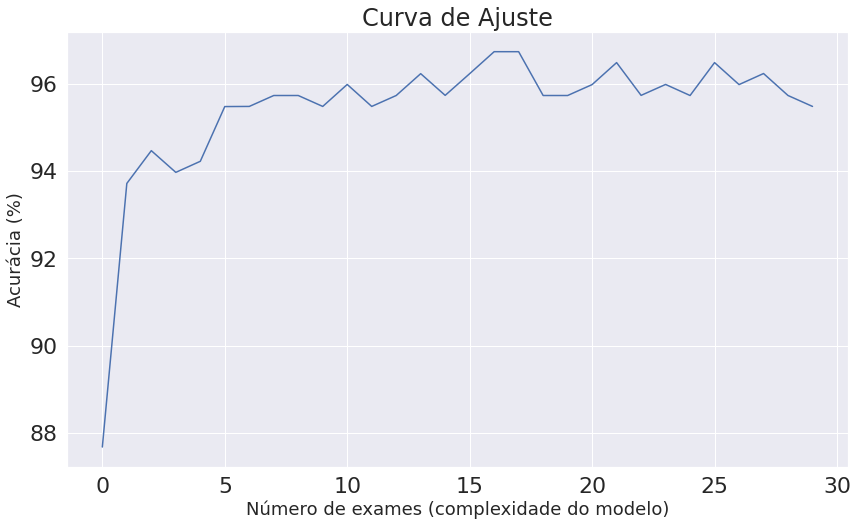

In [ ]:
#construindo a curva de ajuste, temos:
plt.figure(figsize = (14,8))

plt.title('Curva de Ajuste')
plt.xlabel('Número de exames (complexidade do modelo)', fontsize = 18)
plt.ylabel('Acurácia (%)', fontsize = 18)
plt.plot(ajuste_acuracia['mean_test_score']*100)

A partir da curva de ajuste, podemos verificar que inicialmente há um aumento significativo na acurácia do modelo e, após 5 features o acréscimo de desempenho torna-se cada vez menor. Ou seja, a derivada torna-se cada vez menos à medida que aumentamos o número de atributos no modelo, chegando a um máximo em número de exames = 17, como indicado anteriormente. Após 17 features, há uma pequena degradação da acurácia do modelo, devido ao sobreajuste dos dados. Portanto, a partir deste resultado, podemos selecionar apenas 17 atributos, o que significa em diminuição de custos com exames para a predição da doença.

#Redução da dimensionalidade com PCA

A técnica PCA é usada para a redução da dimensionalidade de um conjunto de dados, ou seja, reduzir o número de features utilizadas, a partir da determinação de um número menor de variáveis que não são correlacionadas entre si, reduzindo a redundância no modelo preditivo.

No presente exemplo, vamos reduzir a quantidade de features de 30 para 4. A técnica extrai um conjunto de dados de menor dimensão, denominados de componentes principais, a partir de um conjunto de maior dimensão. 

Para utilizar a técnica PCA, é necessários que todos os dados sejam numéricos e padronizados. Caso os dados sejam categóricos, devem ser convertidos para valores numéricos e padronizados. A utilização do PCA em variáveis com diferentes escalas irá gerar resultados insatisfatórios. 

A redução de dimensionalidade é útil quando se trabalha com dados comm muitos atributos previsores (features); impliaca na redução do tempo de treinamento do modelo, exigindo um menor poder computacional; menor espaço ocupado na memória, uma vez que dados redundantes, obsoletos e altamente correlacionados entre si são removidos da base de dados, levando a um melhor desempenho do modelo preditivo. 

Os componentes principais são obtidos de tal forma que o primeiro explica a variação máxima do conjunto de dados originais; o segundo explica explica a segunda maior variância do modelo e não está correlacionado com o primeiro componente; o terceiro tenta explicar o restante dos dados e não está correlacionado com os dois primeiros. 

Documentação do PCA na biblioteca sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Para o nosso conjunto de dados de exames, temos:

In [ ]:
from sklearn.decomposition import PCA

#fazendo a redução da dimensionalidade com o PCA

X = base_dados_padronizada.drop(columns = 'diagnostico')

X_pca = PCA(n_components = 4)
#ajuste das features ao PCA
X_pca.fit(X)

PCA(n_components=4)

No código acima, as 30 features contidas inicialmente na base de dados padronizada foram reduzidas para 4 componentes principais, sem perda de informações da base de dados, que seria observado na remoção de colunas do conjunto de dados.

Avaliando o processo de redução de dimensionalidade, temos:

In [ ]:
#avaliando a variância explicada por cada componente principal:

print(X_pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


**interpretação da variância explicada**

as 30 features foram reduzidas para 4 componentes principais, onde o primeiro componente explica 44,27% da variância, o segundo explica 18,97% e os demais explica 9,3% e 6,6% da variância do conjunto de dados, respectivamente.

In [ ]:
#variância total explicada pelos componentes principais criados
X_pca.explained_variance_ratio_.sum()

0.7923850582444224

Ao todos, os 4 componentes principais explicam 79% da variância do conjunto de dados.

In [ ]:
#transformação dos dados de features
X_pca = X_pca.transform(X)

In [ ]:
X_pca.shape

(569, 4)

Usando a nova base de dados com dimensionalidade menor, temos:

In [ ]:
#Segmentando os dados em teste e treino
X = X_pca
y = base_dados['diagnostico']

#parâmetro de aleatoriedade
SEED = 1234
random.seed(SEED)

#segmentos de teste e treino contendo todas as features
treino_X, teste_X, treino_y, teste_y = train_test_split(X, y, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)

classificador.fit(treino_X, treino_y)

#acurácia do modelo
print('Resultado da acurácia do modelo com os dados de teste: {:.2f}%'.format(classificador.score(teste_X, teste_y)*100))

Resultado da acurácia do modelo com os dados de teste: 89.47%
